In [103]:
import os
import numpy as np
import shutil
import pandas as pd
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [104]:
classes_dir = ['0', '1']
processed_dir = 'superData'
val_ratio = 0.20
test_ratio = 0.20
data = {'0': [], '1': []}
max_length = 0
for cls in classes_dir:
    src = os.path.join(processed_dir, cls)
    allFileNames = os.listdir(src)
    class_length = len(allFileNames)
    if class_length > max_length:
        max_length = class_length
    data[cls].extend([os.path.join(src, f) for f in allFileNames])
for key in data:
    data[key] += [None] * (max_length - len(data[key])) # Pad with None for missing entries
df = pd.DataFrame(data)
print(df.head(5))
print(df.describe())

                               0                       1
0       superData\0\14115501.jpg    superData\1\img1.jpg
1       superData\0\14115505.jpg   superData\1\img10.jpg
2       superData\0\14115509.jpg  superData\1\img100.jpg
3  superData\0\img_yvng59020.jpg  superData\1\img101.jpg
4  superData\0\img_yvng59021.jpg  superData\1\img102.jpg
                               0                     1
count                         40                   100
unique                        40                   100
top     superData\0\14115501.jpg  superData\1\img1.jpg
freq                           1                     1


In [147]:
from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import canny
import os

target = []
images = []   # In matrix format
flat_data = []  # In vector format
edge_count = []  # Store edge presence information

datadir = './superData'
categories = ['0', '1']

for category in categories:
    class_index = categories.index(category)
    path = os.path.join(datadir, category)
    for img_file in os.listdir(path):
        img_matrix = imread(os.path.join(path, img_file))
        img_resized = resize(img_matrix, (150, 150, 3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(category)
#         gray_img = rgb2gray(img_resized)
#         edges = canny(gray_img)
#         edge_count.append(edges)



In [130]:
df = pd.DataFrame(flat_data)
df['Target'] = target

In [131]:
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.982744,0.982744,0.982744,0.961787,0.961787,0.961787,0.996565,0.996565,0.996565,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.982744,0.982744,0.982744,0.961787,0.961787,0.961787,0.996565,0.996565,0.996565,0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.982744,0.982744,0.982744,0.961787,0.961787,0.961787,0.996565,0.996565,0.996565,0
3,0.999999,0.999999,0.999999,0.999355,0.999355,0.999355,0.990766,0.990766,0.990766,0.991365,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
136,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
137,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
138,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1


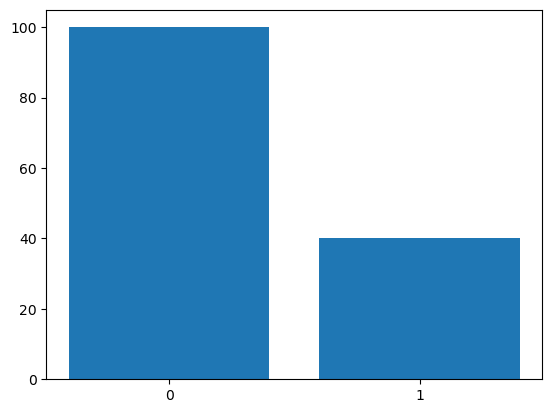

In [132]:
plt.bar(categories,df['Target'].value_counts())
plt.show()

In [133]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = df.columns.difference(['Target'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the selected columns
df_normalized = df.copy()  # Make a copy of the DataFrame to not modify the original
df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df=df_normalized.copy()

In [134]:
from sklearn.preprocessing import StandardScaler

# Assuming 'Target' is the column containing string values that need to be converted
df['Target'] = pd.to_numeric(df['Target'], errors='coerce')  # Convert 'Target' column to numeric values

columns_to_normalize = df.columns.difference(['Target'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the selected columns
df_normalized = df.copy()  # Make a copy of the DataFrame to not modify the original
df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df = df_normalized.copy()

# Input and Output 
x = df.iloc[:, 0:6750].values

threshold = 0.5  # Define your threshold value
y_binarized = np.where(df['Target'] > threshold, 1, 0)  # Binarize the target variable

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
k=np.arange(1,20)
param={'n_neighbors':k}
model=KNeighborsClassifier()
model_grid=GridSearchCV(model,param)
model_grid.fit(x,y_binarized)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [136]:
# Best K nearest neighbor
model_grid.best_params_

{'n_neighbors': 1}

In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y_binarized,random_state=0)

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [93]:
model = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
model.fit(x_train,y_train)    

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [94]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [95]:
# Evaluation of the model
from sklearn.metrics import accuracy_score
print("The accuracy of the model is ",accuracy_score(y_pred,y_test)*100,"%")

The accuracy of the model is  97.14285714285714 %


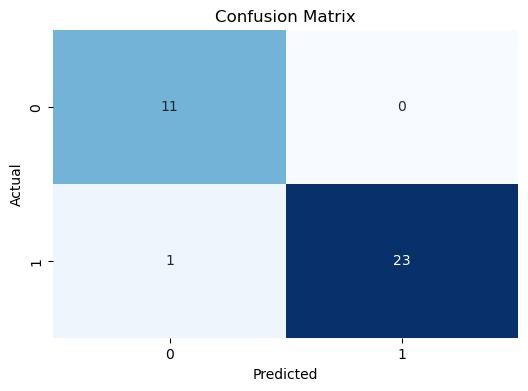

In [96]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [97]:
#add new picture-1
img1 = imread('./ed2.JPG')
img1_resize = resize(img1, (150, 150, 3))
img1_flatten = img1_resize.flatten()

# Reshape img1_flatten to have 6750 features
img1_flatten_6750 = img1_flatten[:6750]  # selecting the first 6750 features

# Create and fit the KNeighborsClassifier model
model = KNeighborsClassifier()
model.fit(x_train, y_train)  # Assuming you have training data X_train and corresponding labels y_train

# Make predictions with the fitted model using the modified input
img1_pred = model.predict([img1_flatten_6750])
img1_pred

array([1])

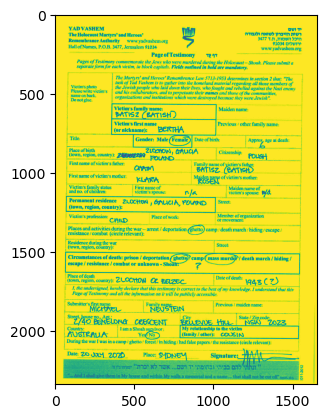

In [98]:
plt.imshow(img1)

In [99]:
#add new picture-2
img1 = imread('./edp.JPG')
img1_resize = resize(img1, (150, 150, 3))
img1_flatten = img1_resize.flatten()

# Reshape img1_flatten to have 6750 features
img1_flatten_6750 = img1_flatten[:6750]  # selecting the first 6750 features

# Create and fit the KNeighborsClassifier model
model = KNeighborsClassifier()
model.fit(x_train, y_train)  # Assuming you have training data X_train and corresponding labels y_train

# Make predictions with the fitted model using the modified input
img1_pred = model.predict([img1_flatten_6750])
img1_pred

array([0])

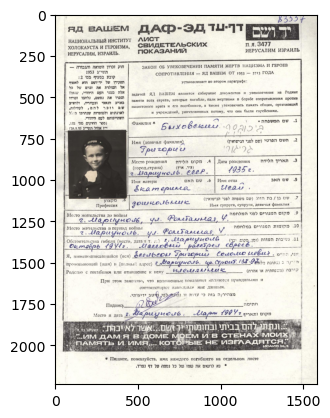

In [100]:
plt.imshow(img1)

Trian accuracy of the model: 0.9809523809523809
Test accuracy of the model: 0.9142857142857143


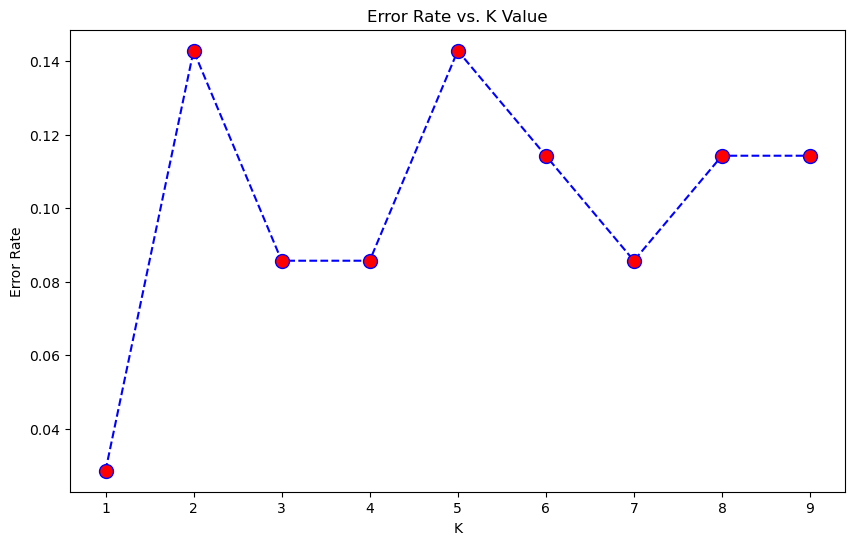

In [101]:
#KNN
error_rate=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');
clf = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
print(f'Trian accuracy of the model: {clf.score(x_train, y_train)}')
print(f'Test accuracy of the model: {clf.score(x_test, y_test)}')

In [ ]:
import joblib
joblib.dump(clf, 'knn_modelEd.pkl')